# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [107]:
temp = pd.read_csv('/Users/mmeegg/Ironhack/lab-descriptive-stats-es/your-code/Temp_States.csv')

#### Print `temp`

In [108]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [109]:
types = temp.dtypes
print(types)

City            object
State           object
Temperature    float64
dtype: object


#### Selecciona las filas en las que el estado es New York

In [110]:
rows_NY = temp.loc[temp["State"]=="New York"]
rows_NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [111]:
AVG_NY_temp = rows_NY["Temperature"].mean()
AVG_NY_temp

10.74074074074074

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [112]:
more_than_15 = temp.loc[temp["Temperature"]>15, ["City", "State"]]
more_than_15

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [113]:
city_more_than_15 = temp.loc[temp["Temperature"]>15, "City"]
city_more_than_15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [114]:
temp_15_to_20 = temp.loc[temp["Temperature"].between(15, 20), "City"]
temp_15_to_20

0         NYC
3    Hartford
6      Newark
Name: City, dtype: object

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [115]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

In [116]:
calculation = temp.groupby("State")["Temperature"].agg(["mean", "std"]).reset_index()
calculation


,State,mean,std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [117]:
employee = pd.read_csv("/Users/mmeegg/Ironhack/lab-descriptive-stats-es/your-code/Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [118]:
types_employee = employee.dtypes
types_employee

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

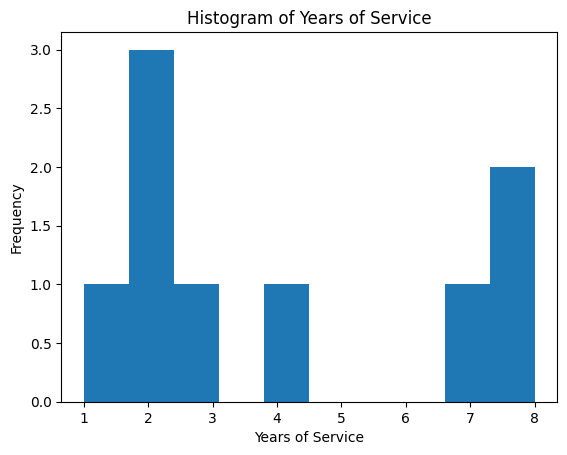

In [119]:
# create plt
fig, ax = plt.subplots()
x = employee["Years"]
ax.hist(x)
ax.set_xlabel("Years of Service")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Years of Service")
plt.show()



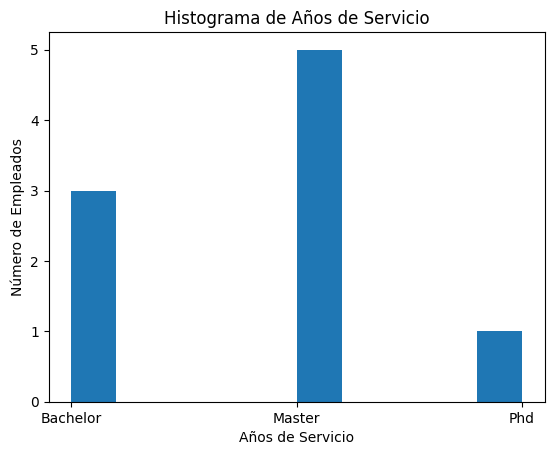

In [120]:
fig, ax = plt.subplots()
x = employee['Education']
ax.hist(x)
ax.set_xlabel('Años de Servicio')
ax.set_ylabel('Número de Empleados')
ax.set_title('Histograma de Años de Servicio')
plt.show()

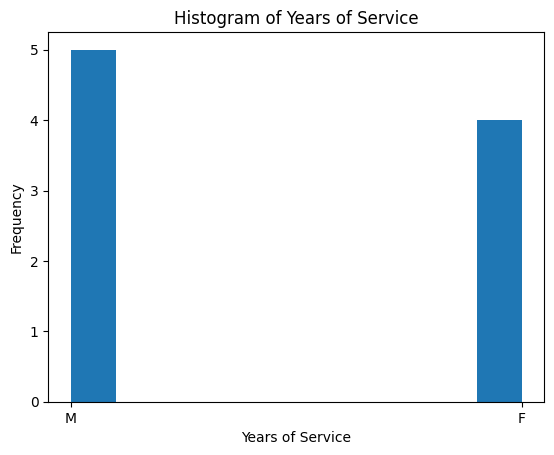

In [121]:
# create plt
fig, ax = plt.subplots()
x = employee["Gender"]
ax.hist(x)
ax.set_xlabel("Years of Service")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Years of Service")
plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [122]:
avg_salary = employee['Salary'].mean().__round__(2)
avg_salary

48.89

#### ¿Cuál es el salario más alto?

In [123]:
highest_salary = employee["Salary"].max()
highest_salary

70

#### ¿Cuál es el salario más bajo?

In [124]:
lowest_salary = employee["Salary"].min()
lowest_salary

30

#### ¿Quiénes son los empleados con el salario más bajo?

In [125]:
person_low_wage = employee.loc[employee["Salary"].idxmin(), "Name"]
person_low_wage

'Maria'

#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [126]:
info_David = employee.loc[employee["Name"] == "David"]
info_David

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [127]:
salary_David = info_David["Salary"]
salary_David

2    30
Name: Salary, dtype: int64

#### Printea todas las líneas en las que el cargo es asociado

In [128]:
df_associate = employee.loc[employee["Title"] == "associate"]
df_associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [129]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [130]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [131]:
mask = (employee["Title"] == "associate") & (employee["Salary"] > 55)
associate_and_55_more = employee.loc[mask, "Name"]
associate_and_55_more

7    Pedro
Name: Name, dtype: object

#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [132]:
df_service_year = employee.groupby("Years")["Salary"].mean().reset_index()
df_service_year

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


#### ¿Cuál es el salario medio por título?

In [133]:
df_title_salary = employee.groupby("Title")["Salary"].mean().reset_index()
df_title_salary

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

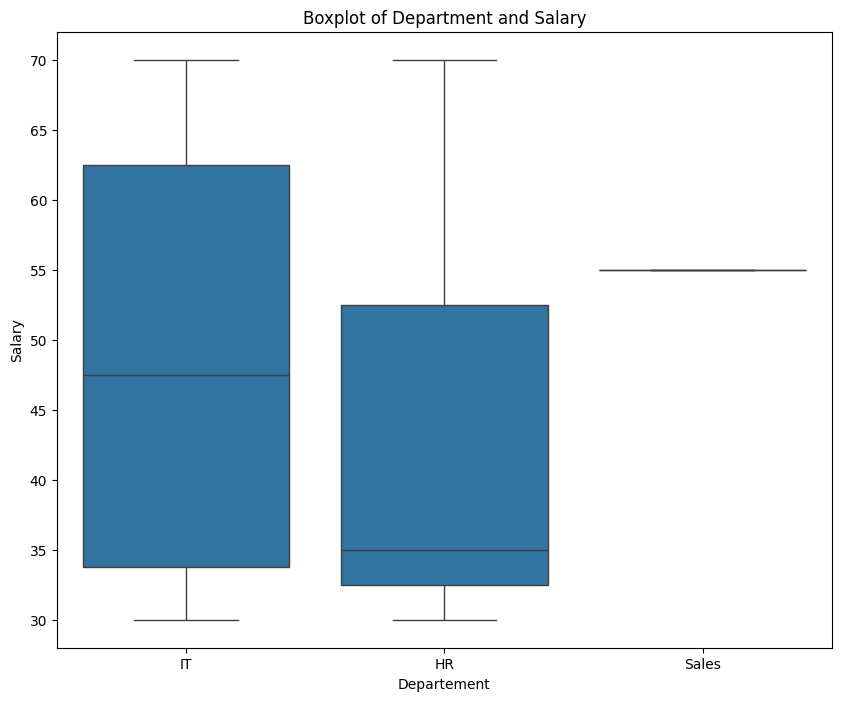

In [134]:
plt.figure(figsize=(10,8))
sns.boxplot(x= 'Department', y= 'Salary', data=employee)
plt.xlabel("Departement")
plt.ylabel("Salary")
plt.title("Boxplot of Department and Salary")
plt.show()

In [135]:
# print first quartile here
first_quarter = employee["Salary"].quantile()
first_quarter

55.0

In [136]:
# print third quartile here
third_quarter = employee["Salary"].quantile(.75)
third_quarter

60.0

#### ¿Es diferente el salario medio por género?

In [146]:
avg_salary_gender = employee.groupby("Gender")["Salary"].mean().reset_index()
avg_salary_gender

salary_m = avg_salary_gender.loc[avg_salary_gender["Gender"] == "M", "Salary"].values[0]
salary_f = avg_salary_gender.loc[avg_salary_gender["Gender"] == "F", "Salary"].values[0]
                                 
if salary_m != salary_f:
    print("There is different in average salary by gender.")
else:
    print("There is no diffference.")

There is different in average salary by gender.


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [167]:
df_by_department = employee.groupby("Department")
numerical_columns = employee.select_dtypes(include=['number']).columns

aggregated_values = df_by_department[numerical_columns].agg(["min", "mean", "max"]).reset_index()
aggregated_values

Department Years               Salary           
               min      mean max    min   mean max
0         HR     2  4.666667   8     30  45.00  70
1         IT     1  4.500000   8     30  48.75  70
2      Sales     2  2.500000   3     55  55.00  55

### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [176]:
min_and_max= df_by_department["Salary"].agg(["min", "max"])
min_and_max

difference = min_and_max.apply(lambda x: x["max"]-x["min"], axis=1) 
difference


Department
HR       40
IT       40
Sales     0
dtype: int64

# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [178]:
pedidos = pd.read_csv("/Users/mmeegg/Ironhack/lab-descriptive-stats-es/your-code/Orders.csv")
pedidos

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [180]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [181]:
pedidos.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


#### ¿Cuál es el precio medio de compra?

In [185]:
avg_price = pedidos["UnitPrice"].mean()
avg_price.__round__(2)

3.12

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [186]:
max = pedidos["UnitPrice"].max()
min = pedidos["UnitPrice"].min()
print(f"The maximum price is :{max:.2f} and the minimum price is :{min:.2f}")

The maximum price is :8142.75 and the minimum price is :0.00


#### Seleccione todos los clientes que tenemos en España

In [187]:
client_spain = pedidos.loc[pedidos["Country"] == "Spain"]
client_spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [191]:
num_client_spain = client_spain["Country"].value_counts()
num_client_spain

Country
Spain    2485
Name: count, dtype: int64

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [196]:
filter1 = pedidos["Quantity"] > 50
purchase_more_than_50 = pedidos.loc[filter1, "CustomerID"]
purchase_more_than_50

46        13748
83        15291
96        14688
102       14688
174       16029
          ...  
397720    18102
397721    16626
397729    16626
397761    15311
397882    13777
Name: CustomerID, Length: 11609, dtype: int64

#### Selecciona pedidos de España superiores a 50 artículos

In [199]:
filter2 = (pedidos["Quantity"] > 50) & (pedidos["Country"] == "Spain")
orders_spain_morethan_50 = pedidos.loc[filter2, "InvoiceNo"]
orders_spain_morethan_50

4250      536944
4251      536944
4252      536944
4253      536944
4254      536944
32454     540785
32455     540785
32456     540785
32457     540785
91155     547972
91156     547972
91159     547972
174442    558871
174443    558871
174444    558871
174445    558871
174446    558871
174447    558871
174448    558871
174449    558871
197167    561669
197168    561669
197169    561669
197170    561669
197171    561669
224881    564734
254097    567968
289129    571255
289134    571255
289142    571255
289143    571255
295956    571851
312655    573362
312656    573362
312657    573362
366326    578321
366327    578321
366328    578321
366329    578321
Name: InvoiceNo, dtype: int64

#### Seleccionar todos los pedidos gratuitos

In [201]:
filter3= (pedidos["UnitPrice"] == 0) | (pedidos["amount_spent"] == 0)
free_order = pedidos.loc[filter3, "InvoiceNo"]
free_order

6914      537197
22539     539263
25379     539722
29080     540372
29082     540372
34494     541109
53788     543599
85671     547417
92875     548318
97430     548871
107192    550188
128641    553000
137127    554037
194648    561284
197173    561669
199711    561916
208950    562973
223931    564651
223932    564651
223933    564651
223934    564651
256263    568158
259399    568384
273926    569716
286507    571035
307092    572893
319882    574138
320049    574175
320407    574252
322279    574469
328385    574879
329006    574920
329007    574920
334242    575579
334243    575579
352746    577129
353097    577168
354170    577314
358629    577696
370473    578841
Name: InvoiceNo, dtype: int64

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [206]:
filter4 = pedidos["Description"].str.startswith("lunch bag")
lunch_bag_orders = pedidos.loc[filter4, "InvoiceNo"]
lunch_bag_orders

93        536378
172       536385
354       536401
359       536401
360       536401
           ...  
397465    581486
397713    581538
397714    581538
397877    581581
397880    581583
Name: InvoiceNo, Length: 11556, dtype: int64

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [207]:
filter5 = (pedidos["Description"].str.startswith("lunch bag")) & (pedidos["year"] == 2011)
orders_bag_2011 = pedidos.loc[filter5, "InvoiceNo"]
orders_bag_2011

26340     540015
26341     540015
26512     540023
26513     540023
26860     540098
           ...  
397465    581486
397713    581538
397714    581538
397877    581581
397880    581583
Name: InvoiceNo, Length: 11234, dtype: int64

#### Muestra la distribución de frecuencias del importe gastado en España.

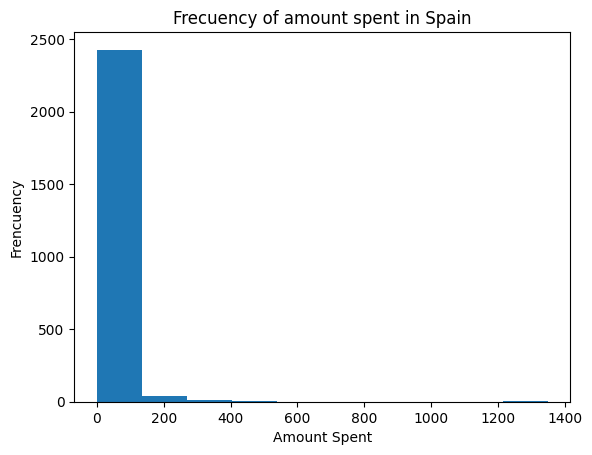

In [229]:
fig, ax = plt.subplots()
x = client_spain["amount_spent"]
ax = plt.hist(x)
plt.xlabel("Amount Spent")
plt.ylabel("Frencuency")
plt.title("Frecuency of amount spent in Spain")
plt.show()

#### Seleccione todos los pedidos realizados en el mes de agosto

In [215]:
filter6 = pedidos["month"] == 8
august_order = pedidos.loc[filter6, "InvoiceNo"]
august_order

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
397919    581587
397920    581587
397921    581587
397922    581587
397923    581587
Name: InvoiceNo, Length: 397924, dtype: int64

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [239]:
per_country = pedidos.groupby("Country")["InvoiceNo"]

for country, group in per_country:
    print(f"Country: {country}")
    print(f"Orders generated: {group.count()}")


Country: Australia
Orders generated: 1185
Country: Austria
Orders generated: 398
Country: Bahrain
Orders generated: 17
Country: Belgium
Orders generated: 2031
Country: Brazil
Orders generated: 32
Country: Canada
Orders generated: 151
Country: Channel Islands
Orders generated: 748
Country: Cyprus
Orders generated: 614
Country: Czech Republic
Orders generated: 25
Country: Denmark
Orders generated: 380
Country: EIRE
Orders generated: 7238
Country: European Community
Orders generated: 60
Country: Finland
Orders generated: 685
Country: France
Orders generated: 8342
Country: Germany
Orders generated: 9042
Country: Greece
Orders generated: 145
Country: Iceland
Orders generated: 182
Country: Israel
Orders generated: 248
Country: Italy
Orders generated: 758
Country: Japan
Orders generated: 321
Country: Lebanon
Orders generated: 45
Country: Lithuania
Orders generated: 35
Country: Malta
Orders generated: 112
Country: Netherlands
Orders generated: 2363
Country: Norway
Orders generated: 1072
Countr

#### ¿Cuál es el gasto medio por país?

In [244]:
avg_cost_country = pedidos.groupby("Country")["amount_spent"]

for country, group in avg_cost_country:
    print(f"Country: {country}")
    print(f"Average cost: {group.mean():.2f}")

Country: Australia
Average cost: 116.90
Country: Austria
Average cost: 25.62
Country: Bahrain
Average cost: 32.26
Country: Belgium
Average cost: 20.28
Country: Brazil
Average cost: 35.74
Country: Canada
Average cost: 24.28
Country: Channel Islands
Average cost: 27.34
Country: Cyprus
Average cost: 22.13
Country: Czech Republic
Average cost: 33.07
Country: Denmark
Average cost: 49.88
Country: EIRE
Average cost: 36.69
Country: European Community
Average cost: 21.67
Country: Finland
Average cost: 32.91
Country: France
Average cost: 25.06
Country: Germany
Average cost: 25.31
Country: Greece
Average cost: 32.83
Country: Iceland
Average cost: 23.68
Country: Israel
Average cost: 29.12
Country: Italy
Average cost: 23.06
Country: Japan
Average cost: 116.56
Country: Lebanon
Average cost: 37.64
Country: Lithuania
Average cost: 47.46
Country: Malta
Average cost: 24.34
Country: Netherlands
Average cost: 120.80
Country: Norway
Average cost: 33.74
Country: Poland
Average cost: 22.23
Country: Portugal


#### ¿Cuál es el artículo más caro?

In [254]:
filter7 = pedidos["UnitPrice"].max()
item_most_expensive = pedidos.loc[pedidos["UnitPrice"] == filter7]
item_most_expensive

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,8,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### ¿Cuál fue la cantidad media gastada al año?

In [256]:
by_year = pedidos.groupby("year")["amount_spent"]

for year, group in by_year:
    print(f"Year: {year}")
    print(f"Average amount spent: {group.mean():.2f}")

Year: 2010
Average amount spent: 21.89
Year: 2011
Average amount spent: 22.43
